In [57]:
import torch
from torch import nn
from input.reading_datasets import *
from input.time_series_module import TimeSeriesDataset
import os
from utils_file import *
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [58]:
torch.cuda.is_available()

True

In [59]:
all_datasets = get_all_datasets(read_from_path=True)

Reading from path


In [60]:
complete_data = get_all_results(False)
# complete_data.query("dataset == 'standwalkjump'")

In [61]:
complete_data

,directory,model_name,dataset,seed,max_train_accuracy,max_test_accuracy,epochs,execution_time,time_per_epoch
0,FullyConvolutionalNetwork1D_articularywordreco...,FullyConvolutionalNetwork1D,articularywordrecognition,1,1.000000,1.000000,5000.0,2.277446,0.000455
1,FullyConvolutionalNetwork1D_articularywordreco...,FullyConvolutionalNetwork1D,articularywordrecognition,2,1.000000,0.991304,5000.0,220.451716,0.044090
2,FullyConvolutionalNetwork1D_articularywordreco...,FullyConvolutionalNetwork1D,articularywordrecognition,3,0.997826,1.000000,5000.0,0.389587,0.000078
3,FullyConvolutionalNetwork1D_articularywordreco...,FullyConvolutionalNetwork1D,articularywordrecognition,4,0.991304,1.000000,5000.0,0.261074,0.000052
4,FullyConvolutionalNetwork1D_articularywordreco...,FullyConvolutionalNetwork1D,articularywordrecognition,5,0.991304,1.000000,5000.0,0.261064,0.000052
...,...,...,...,...,...,...,...,...,...
724,MultiLayerPerceptron_standwalkjump_6,MultiLayerPerceptron,standwalkjump,6,1.000000,0.500000,5000.0,8.519672,0.001704
725,MultiLayerPerceptron_standwalkjump_7,MultiLayerPerceptron,standwalkjump,7,1.000000,0.333333,5000.0,8.507372,0.001701
726,MultiLayerPerceptron_standwalkjump_8,MultiLayerPerceptron,standwalkjump,8,1.000000,0.500000,5000.0,8.522695,0.001705
727,MultiLayerPerceptron_standwalkjump_9,MultiLayerPerceptron,standwalkjump,9,1.000000,0.500000,5000.0,8.554916,0.001711


In [62]:
complete_data.query("model_name == 'InceptionTimeEnsemble'").head(70) #.query("dataset == 'eigenworms'")

,directory,model_name,dataset,seed,max_train_accuracy,max_test_accuracy,epochs,execution_time,time_per_epoch
60,InceptionTimeEnsemble_articularywordrecognition_1,InceptionTimeEnsemble,articularywordrecognition,1,1.000000,0.982609,5000.0,6181.334299,1.236267
61,InceptionTimeEnsemble_articularywordrecognition_2,InceptionTimeEnsemble,articularywordrecognition,2,1.000000,0.956522,2547.0,3110.003373,1.221046
62,InceptionTimeEnsemble_articularywordrecognition_3,InceptionTimeEnsemble,articularywordrecognition,3,1.000000,0.965217,2545.0,3164.868155,1.243563
63,InceptionTimeEnsemble_articularywordrecognition_4,InceptionTimeEnsemble,articularywordrecognition,4,1.000000,1.000000,60.0,75.168627,1.252810
64,InceptionTimeEnsemble_articularywordrecognition_5,InceptionTimeEnsemble,articularywordrecognition,5,0.991304,1.000000,20.0,25.109444,1.255472
...,...,...,...,...,...,...,...,...,...
694,InceptionTimeEnsemble_standwalkjump_6,InceptionTimeEnsemble,standwalkjump,6,1.000000,0.666667,2579.0,1089.131744,0.422308
695,InceptionTimeEnsemble_standwalkjump_7,InceptionTimeEnsemble,standwalkjump,7,1.000000,1.000000,402.0,169.393911,0.421378
696,InceptionTimeEnsemble_standwalkjump_8,InceptionTimeEnsemble,standwalkjump,8,1.000000,0.500000,2520.0,1064.683685,0.422494
697,InceptionTimeEnsemble_standwalkjump_9,InceptionTimeEnsemble,standwalkjump,9,1.000000,0.833333,2809.0,1184.487514,0.421676


In [63]:
agg_results_data = get_all_results(True)

In [64]:
agg_results_data.model_name.unique()

array(['FullyConvolutionalNetwork1D', 'FullyConvolutionalNetwork1DGAP',
       'FullyConvolutionalNetwork1DIntermediate',
       'FullyConvolutionalNetwork1DLate',
       'FullyConvolutionalNetwork1DLateGAP', 'InceptionTime',
       'InceptionTimeEnsemble', 'InceptionTimeEnsembleIntermediate',
       'InceptionTimeEnsembleLate', 'MultiLayerPerceptron'], dtype=object)

In [65]:
agg_results_data.query("model_name == 'InceptionTime'")

,dataset,model_name,max_train_accuracy,max_test_accuracy,epochs,execution_time,time_per_epoch
5,articularywordrecognition,InceptionTime,0.439348,0.397391,1.0,99999.0,99999.0
24,basicmotions,InceptionTime,0.301563,0.293750,1.0,99999.0,99999.0
34,cricket,InceptionTime,0.346528,0.322222,1.0,99999.0,99999.0
50,natops,InceptionTime,0.455247,0.462963,1.0,99999.0,99999.0


In [66]:
agg_results_data.query("model_name == 'FullyConvolutionalNetwork1DGAP'")

,dataset,model_name,max_train_accuracy,max_test_accuracy,epochs,execution_time,time_per_epoch
1,articularywordrecognition,FullyConvolutionalNetwork1DGAP,0.998043,0.995652,1223.600000,64.587083,0.055665
11,atrialfibrillation,FullyConvolutionalNetwork1DGAP,1.000000,0.433333,2520.500000,37.317006,0.014806
20,basicmotions,FullyConvolutionalNetwork1DGAP,1.000000,1.000000,4.600000,0.049344,0.010593
30,cricket,FullyConvolutionalNetwork1DGAP,0.981944,1.000000,12.400000,0.417166,0.034725
40,eigenworms,FullyConvolutionalNetwork1DGAP,1.000000,0.927350,3213.333333,3051.144425,0.958434
46,natops,FullyConvolutionalNetwork1DGAP,0.993403,0.995833,876.300000,28.284067,0.033378
56,racketsports,FullyConvolutionalNetwork1DGAP,1.000000,0.936066,2632.200000,135.415578,0.051074
65,standwalkjump,FullyConvolutionalNetwork1DGAP,1.000000,0.500000,2527.000000,66.115840,0.026158


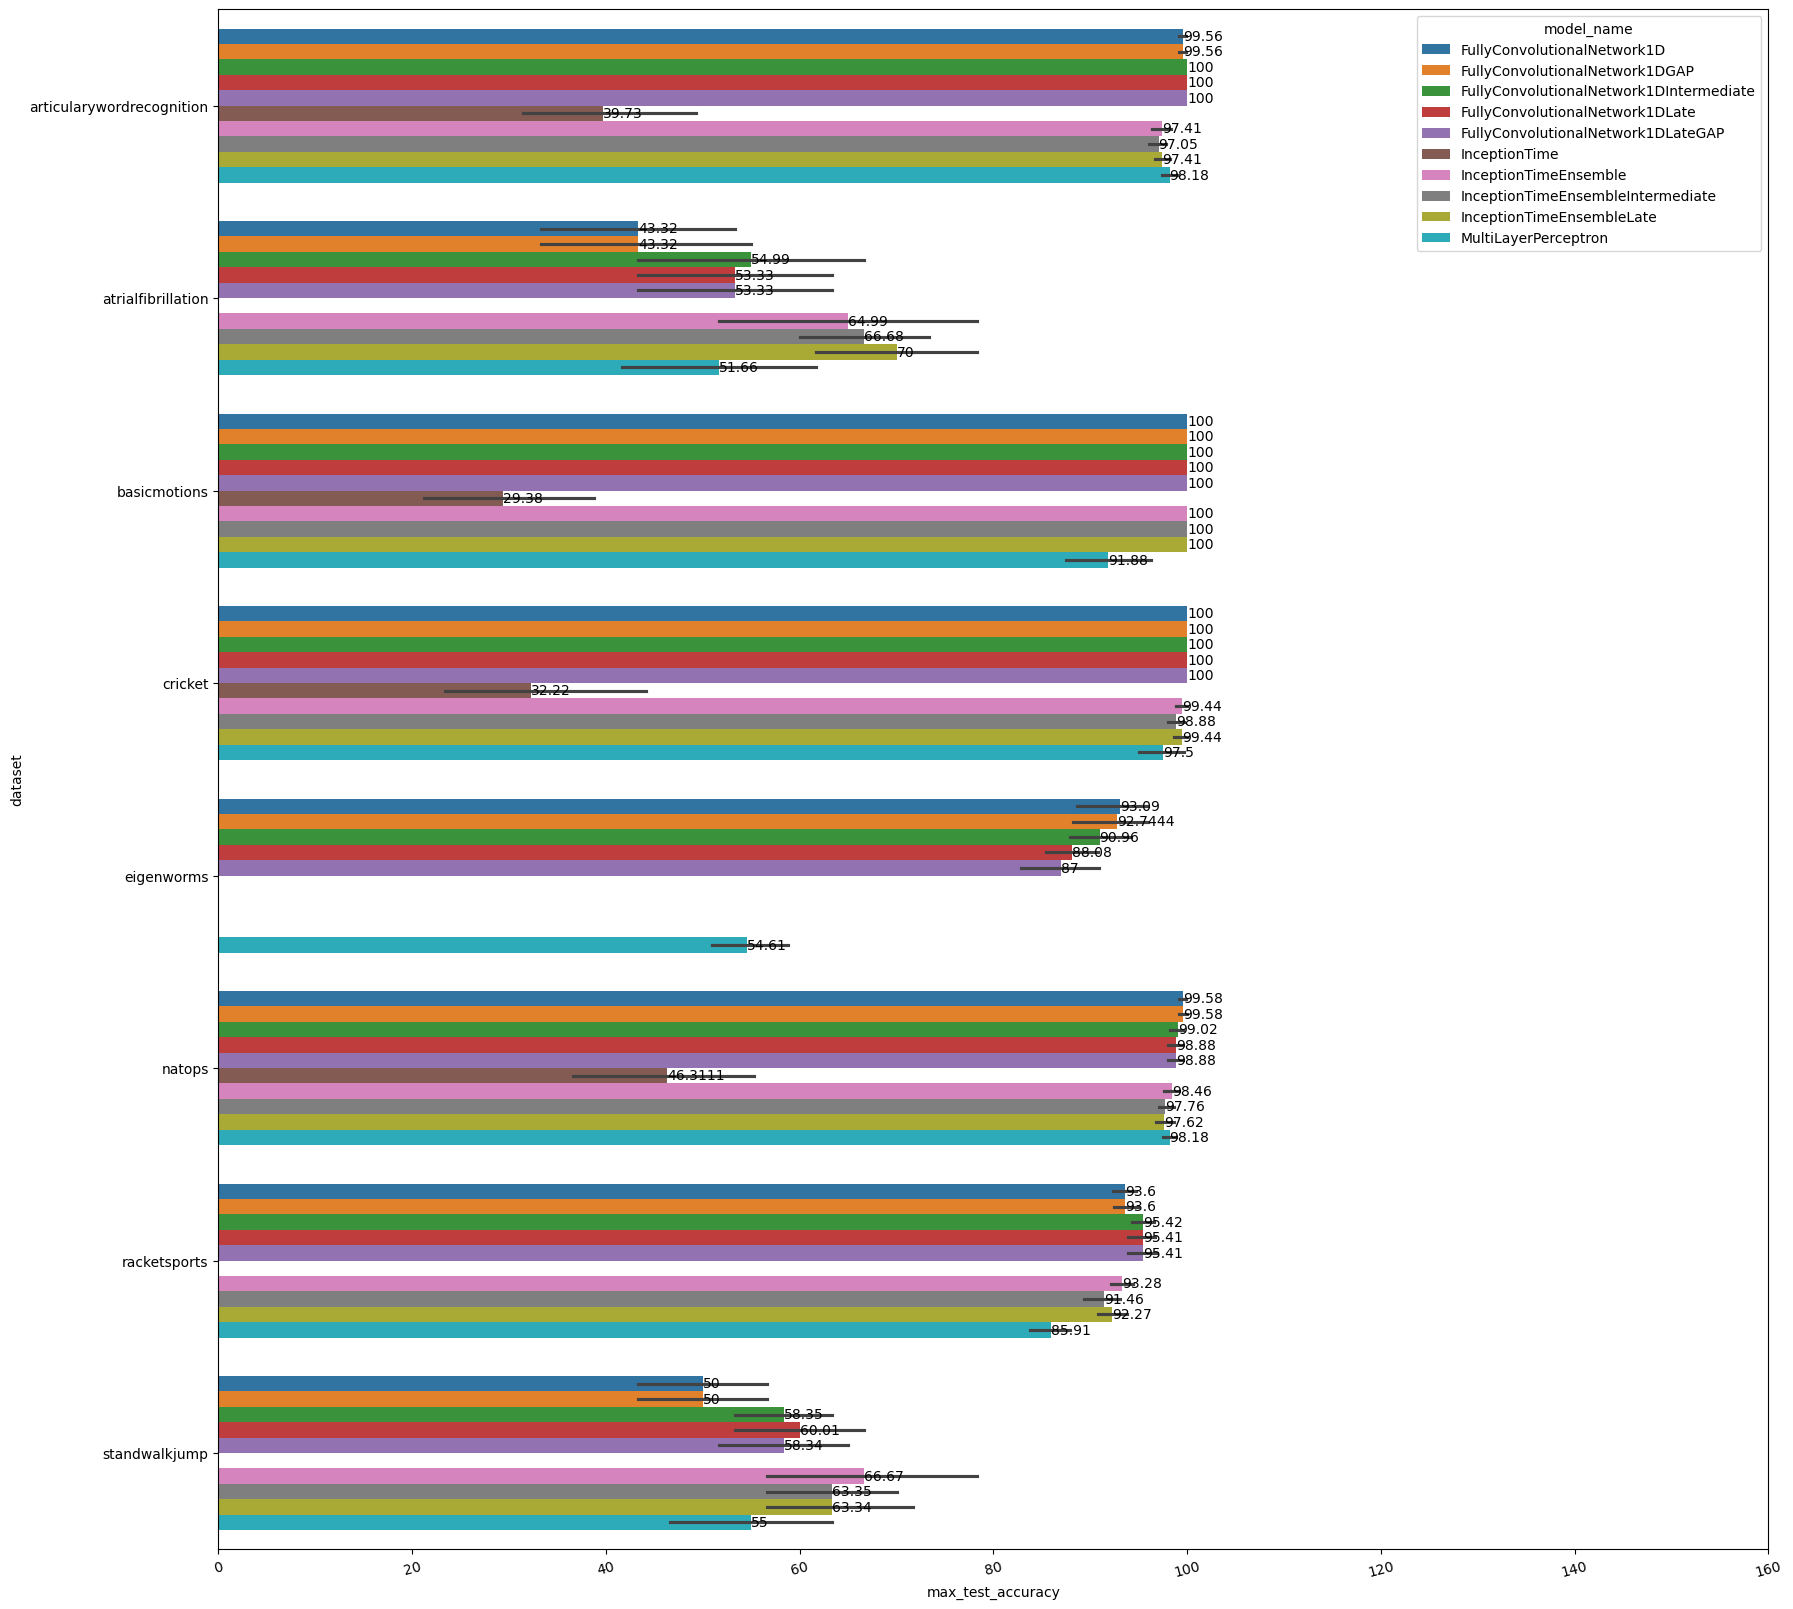

In [67]:
plt.figure(figsize = (20,20))
ax = sns.barplot(
    data = complete_data.query("model_name != 'InceptionTimASDASDASDe'"), 
    y = 'dataset', 
    x = 100*complete_data['max_test_accuracy'].apply(lambda x: round(x, 3)), 
    hue = 'model_name'
)

for i in ax.containers:
    ax.bar_label(i,)

plt.xticks(rotation = 15)
plt.xlim([0, 100*1.6])
plt.show()

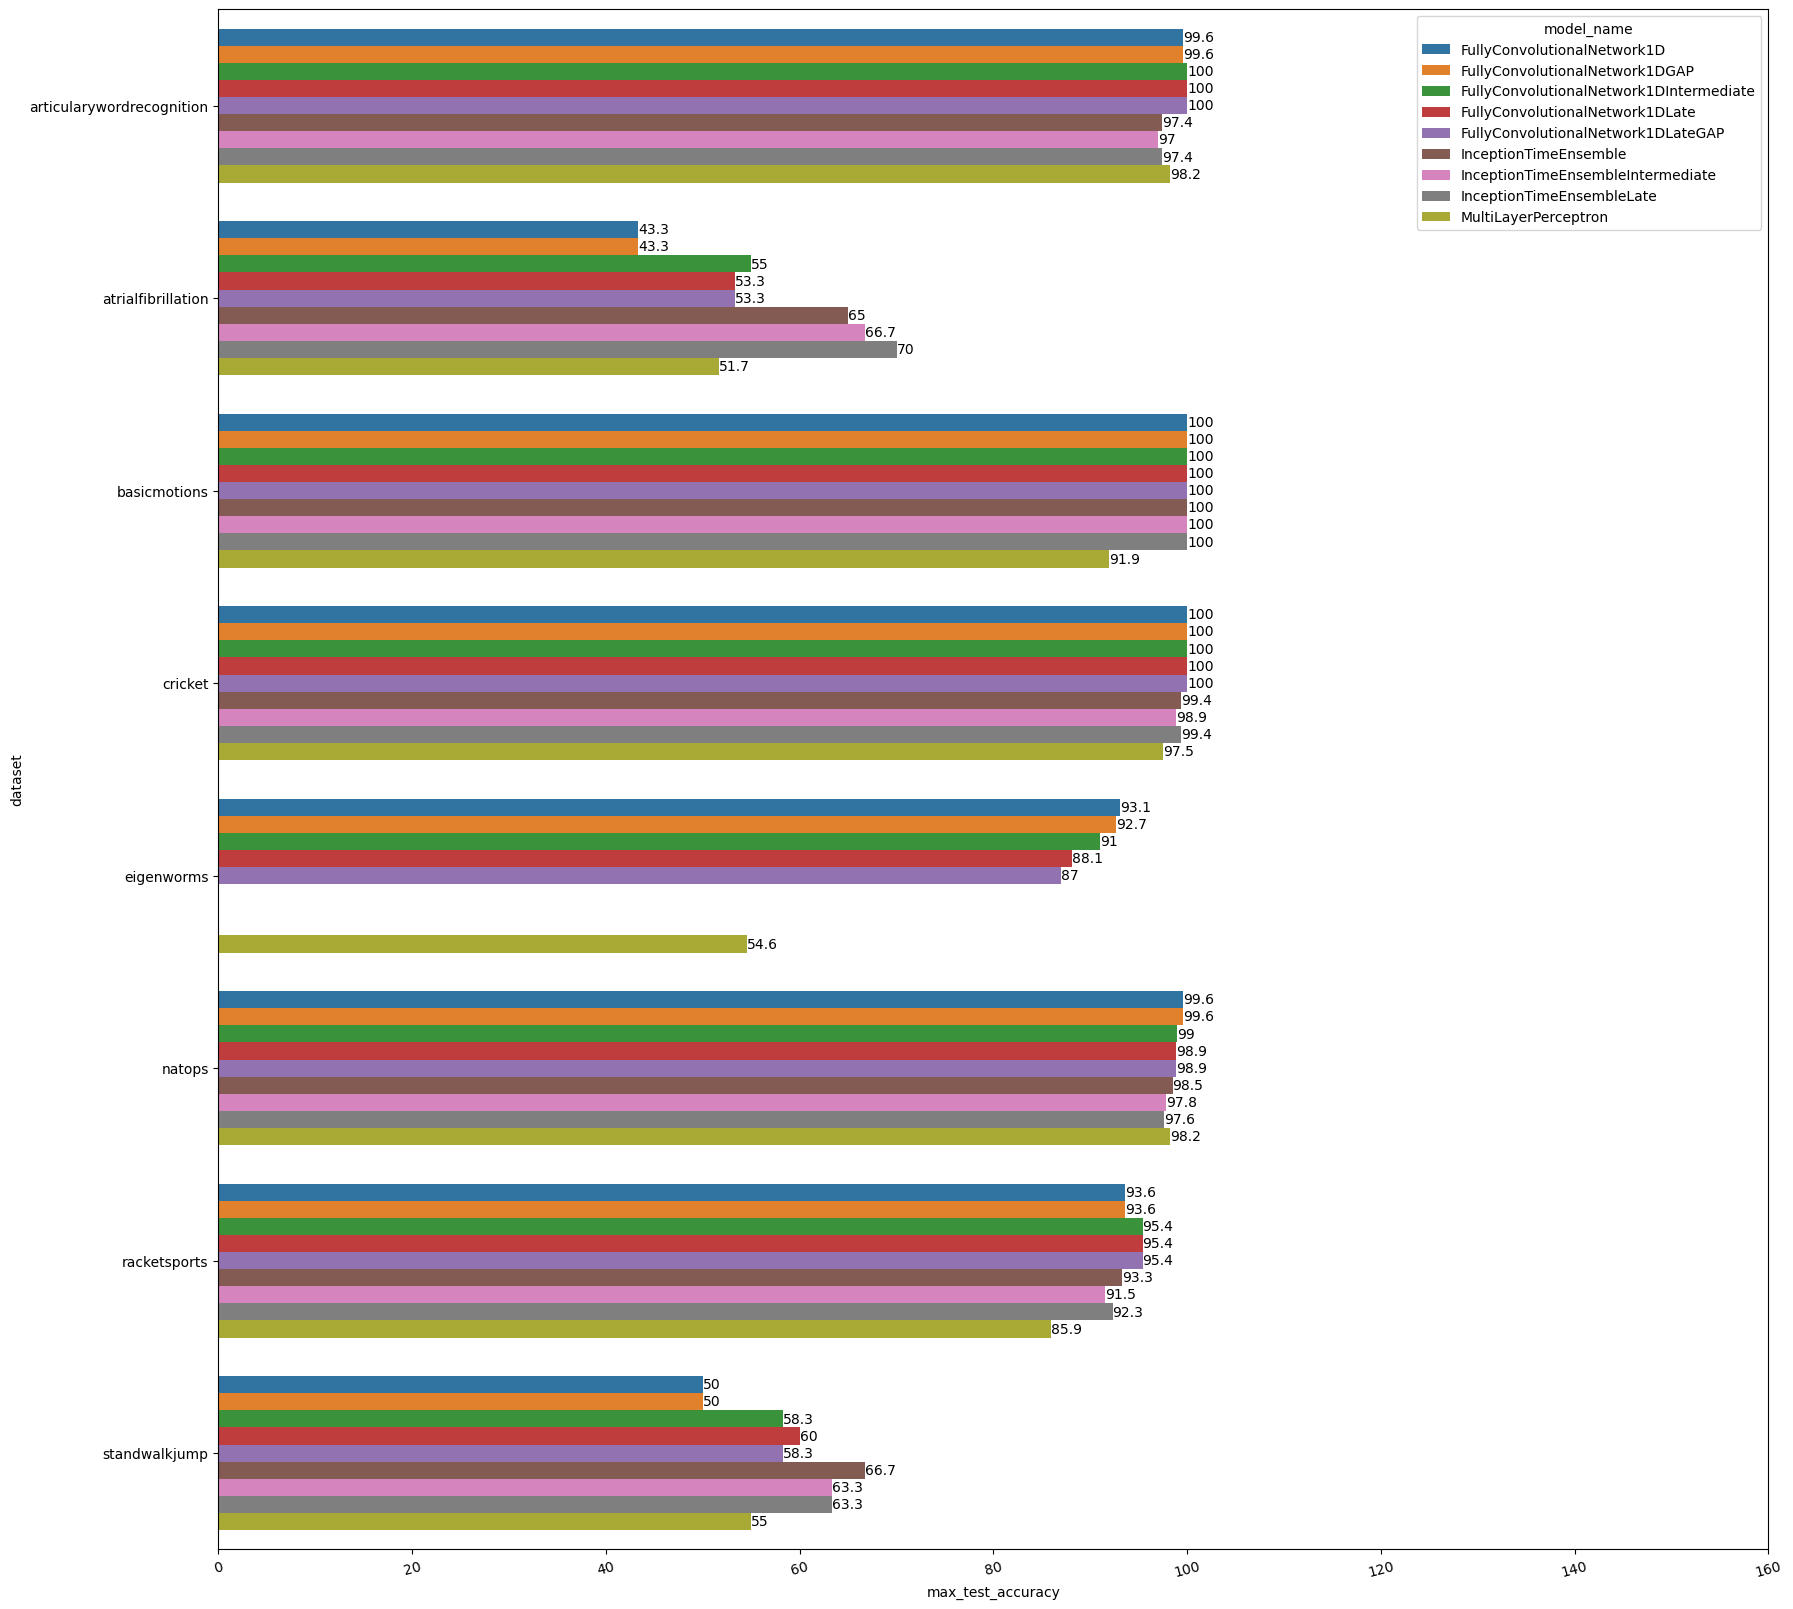

In [68]:
plt.figure(figsize = (20,20))
ax = sns.barplot(
    data = agg_results_data.query("model_name != 'InceptionTime'"), 
    y = 'dataset', 
    x = 100*agg_results_data['max_test_accuracy'].apply(lambda x: round(x, 3)), 
    hue = 'model_name'
)

for i in ax.containers:
    ax.bar_label(i,)

plt.xticks(rotation = 15)
plt.xlim([0, 100*1.6])
plt.show()

In [69]:
test_tensor = torch.ones(1, 10,4)
conv_test = nn.Conv1d(in_channels= 10, out_channels=10, kernel_size = 1)
result = conv_test(test_tensor)

In [70]:
next(conv_test.parameters()).shape

torch.Size([10, 10, 1])

In [71]:
test_tensor.shape

torch.Size([1, 10, 4])

In [72]:
torch.__version__

'2.5.0+cu121'

In [73]:
result.shape

torch.Size([1, 10, 4])